# Cardiovascular Disease Project Summary

# Heart Failure Prediction Dataset

# Supervised Learning 

In [4]:
import warnings
warnings.simplefilter('ignore')
# filtering warnings

# Loading Data and Cleaning Data

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

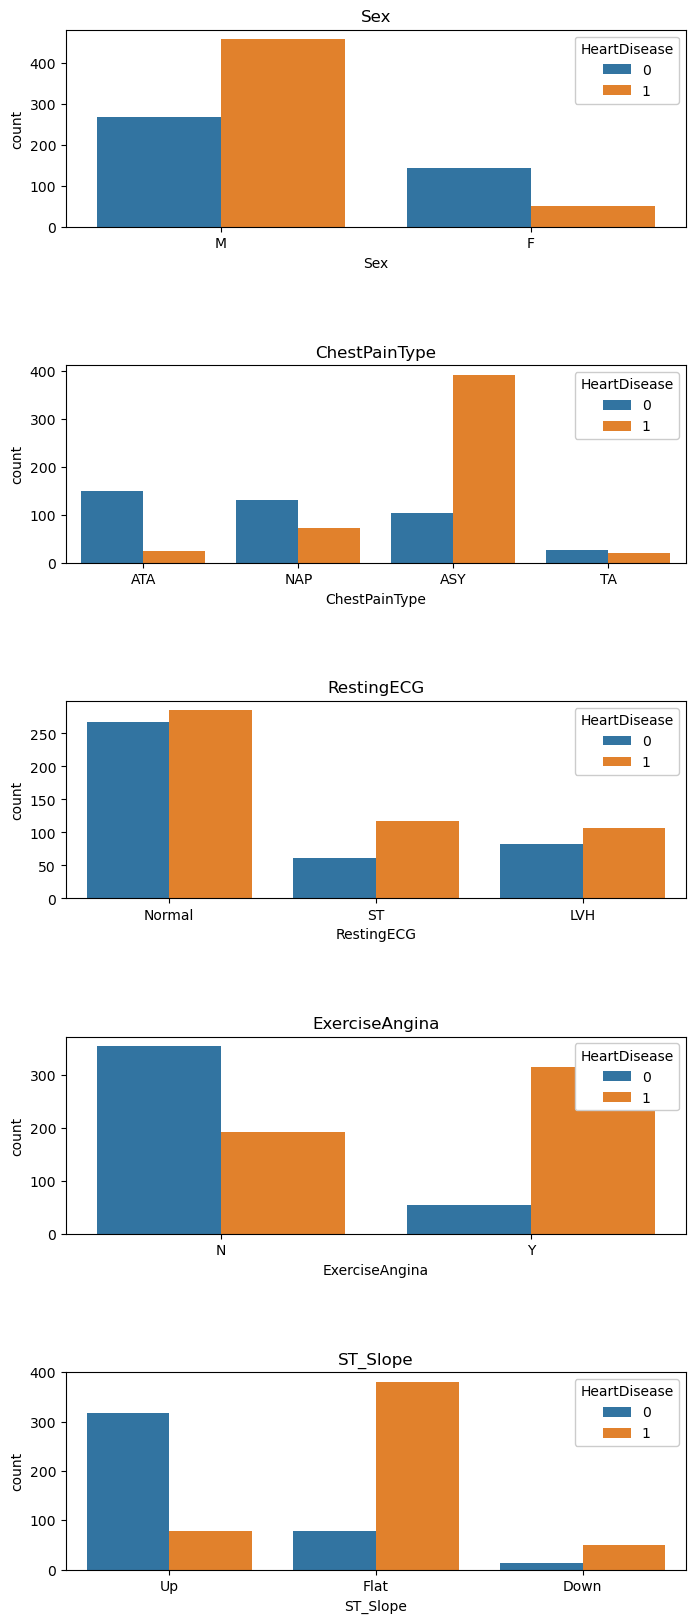

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
data = pd.read_csv('heart.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

# Display basic info to check columns and types
print(data.head())
print(data.info())

# Convert 'HeartDisease' column to string type
data['HeartDisease'] = data['HeartDisease'].astype(str)

# Specify categorical and numerical columns
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Create subplots for categorical features and numerical columns
fig, axs = plt.subplots(len(categorical_features), figsize=(8, 20))


# Plot categorical features
for i, feature in enumerate(categorical_features):
    sns.countplot(data=data, x=feature, hue='HeartDisease', ax=axs[i])
    axs[i].set_title(feature)
    # Modify legend properties
    axs[i].legend(title='HeartDisease', loc='upper right', frameon=True, framealpha=1)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.7)

# Show the plot
plt.show()

# Categorical Features

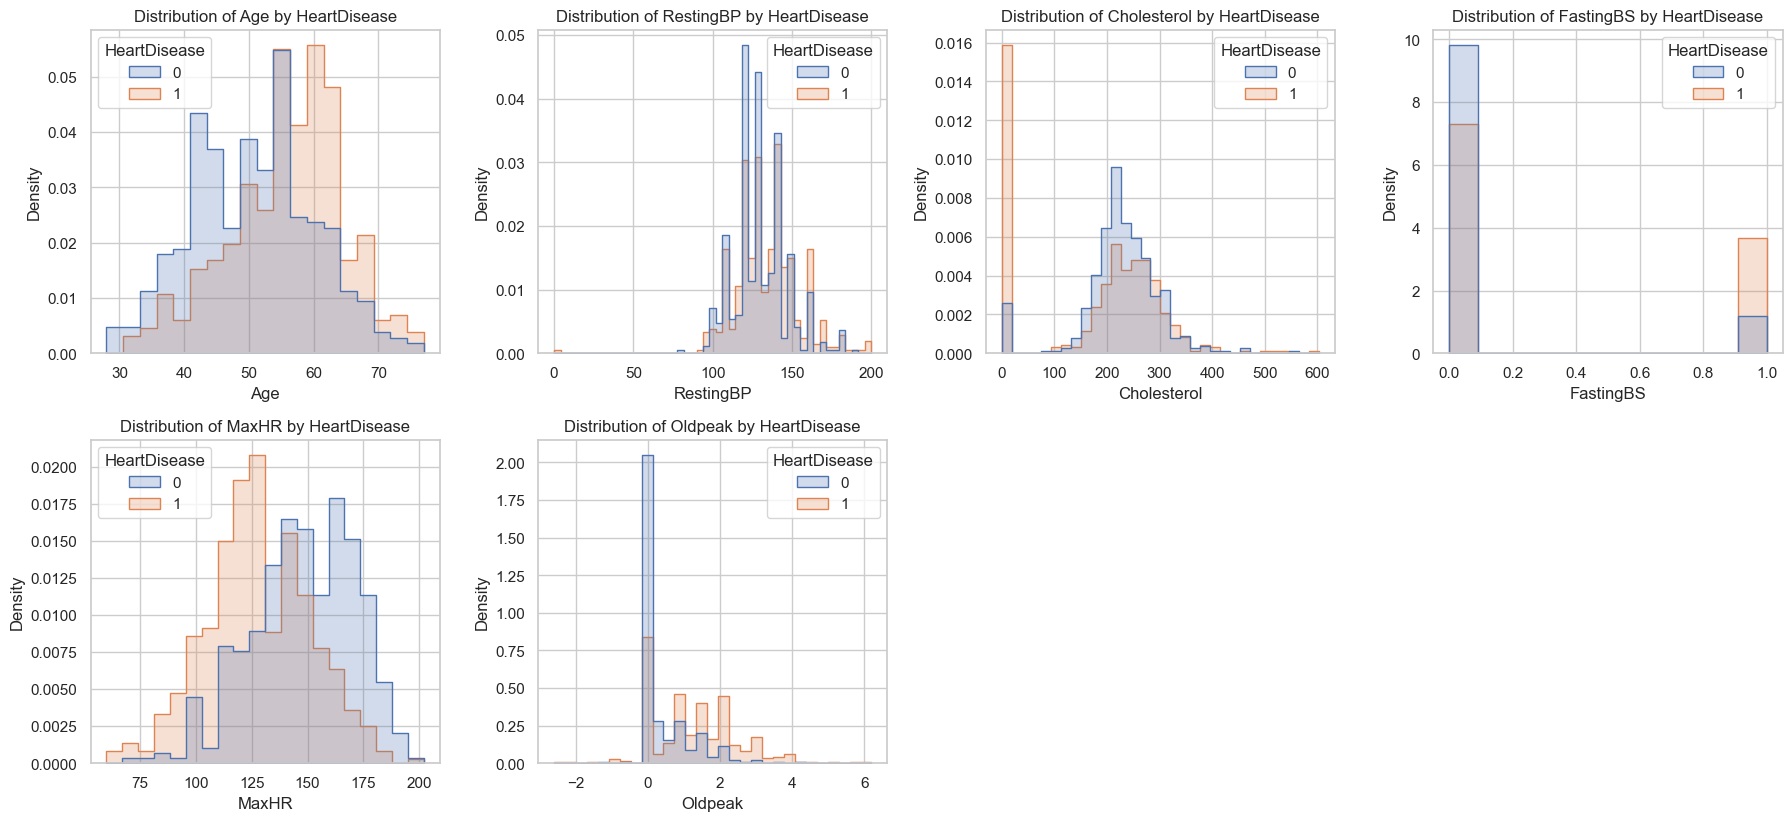

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the aesthetics for the plots
sns.set(style="whitegrid")

# Creating histograms for each numeric feature colored by HeartDisease
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(18, 12))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=data, x=feature, hue='HeartDisease', element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {feature} by HeartDisease')

plt.tight_layout()
plt.show()

# Numeric Features

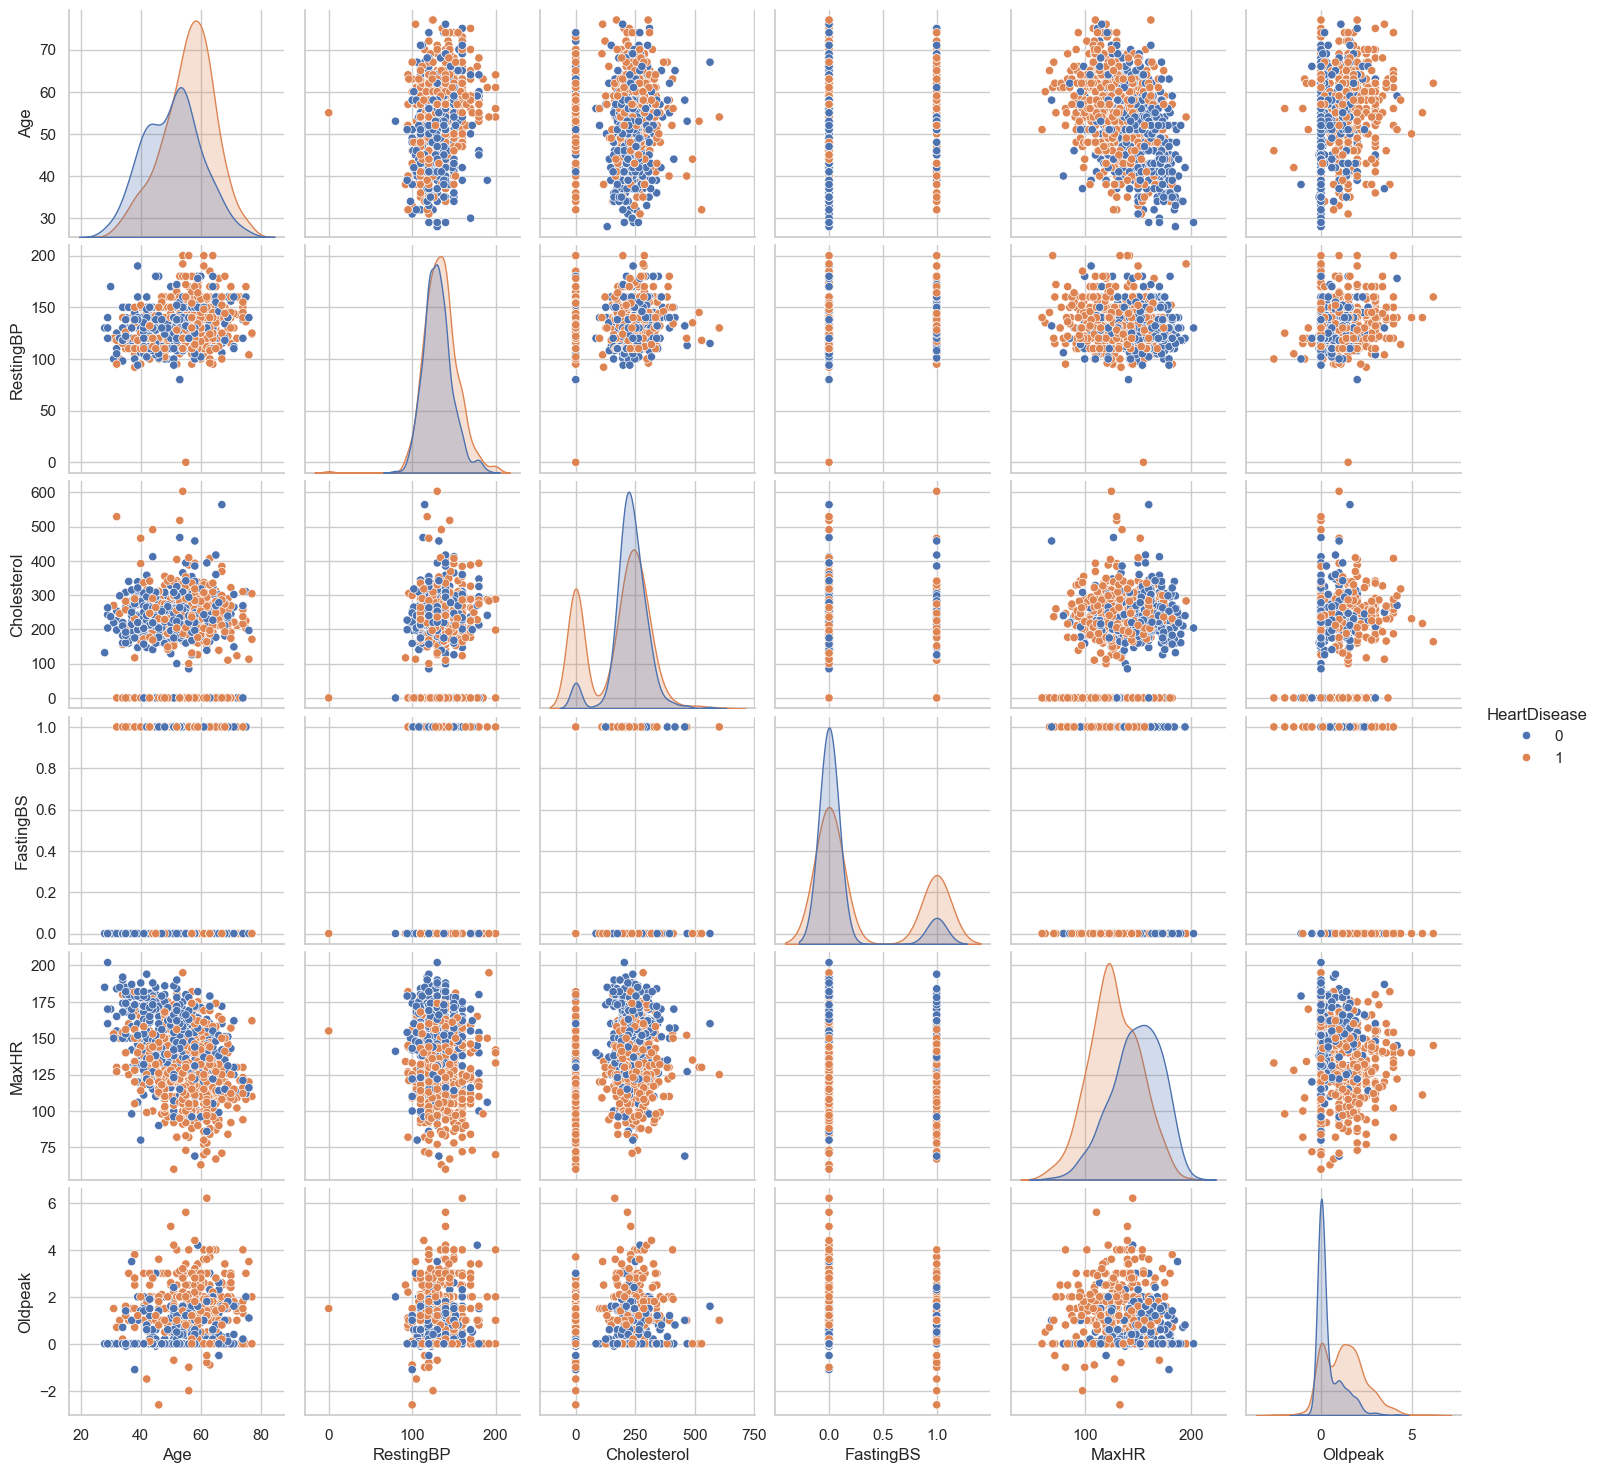

In [10]:
import numpy as np

# Identify numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

# Plotting pairwise relationships
sns.pairplot(data[numerical_features + ['HeartDisease']], hue='HeartDisease')
plt.show()

# K Nearest Neighbors

Best K value: 5
Accuracy: 0.8641304347826086
Precision (PPV): 0.9183673469387755
Recall (TPR): 0.8411214953271028
F1 Score: 0.8780487804878049
ROC AUC Score: 0.8686126957154994
True Positive Rate (TPR): 0.8411214953271028
True Negative Rate (TNR): 0.8961038961038961
False Positive Rate (FPR): 0.1038961038961039
False Negative Rate (FNR): 0.1588785046728972


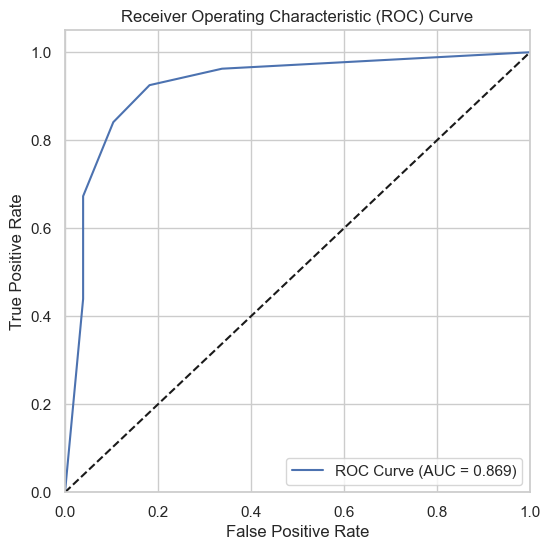

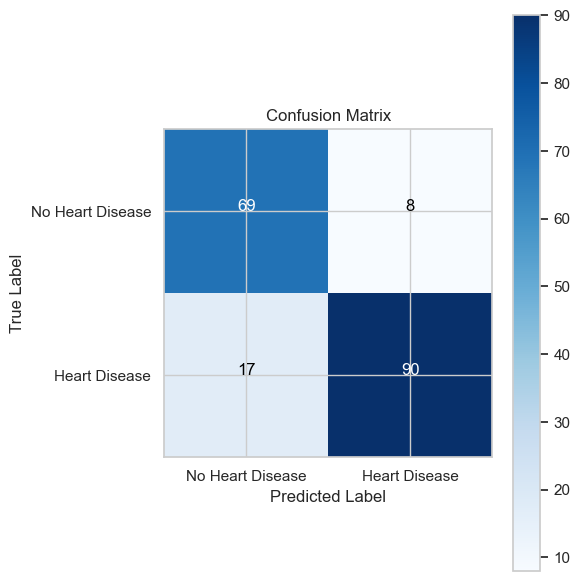

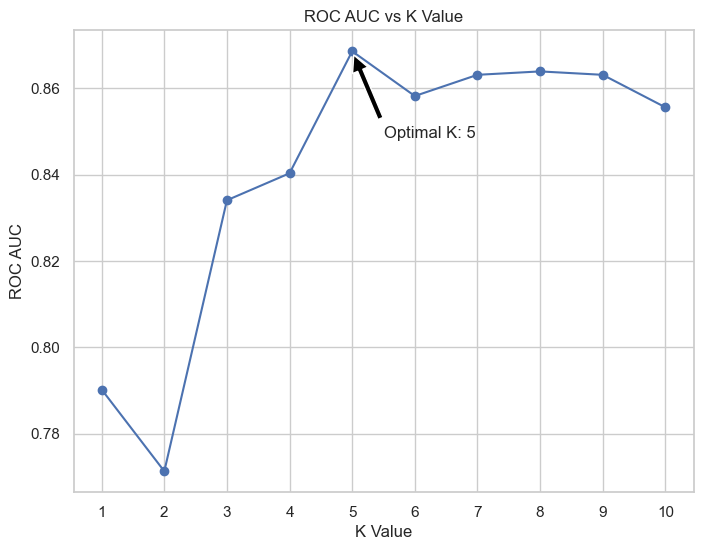

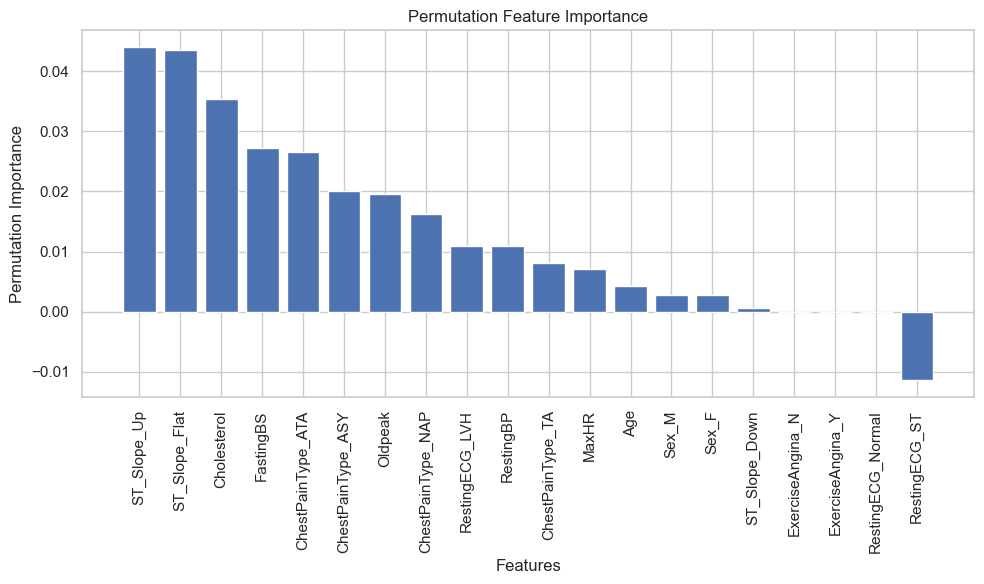

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv('heart.csv')

# Separate the features (X) and target variable (y)
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Handle categorical features
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
X_encoded = pd.get_dummies(X, columns=categorical_features)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize lists to store evaluation metrics for different K values
k_values = list(range(1, 11))
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

# Iterate over different K values
for k in k_values:
    # Create a KNN classifier with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Append the metrics to the respective lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Select the best model based on the highest ROC AUC score
best_k = k_values[np.argmax(roc_auc_scores)]
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

# Make predictions using the best model
y_pred_best = best_model.predict(X_test)

# Calculate confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred_best)
tn, fp, fn, tp = cm.ravel()

# Calculate evaluation metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

# Calculate additional evaluation metrics for the best model
tpr = recall_best
tnr = tn / (tn + fp)
ppv = precision_best
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Print the evaluation metrics for the best model
print("Best K value:", best_k)
print("Accuracy:", accuracy_best)
print("Precision (PPV):", precision_best)
print("Recall (TPR):", recall_best)
print("F1 Score:", f1_best)
print("ROC AUC Score:", roc_auc_best)
print("True Positive Rate (TPR):", tpr)
print("True Negative Rate (TNR):", tnr)
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)

# Plot the ROC curve for the best model
fpr_best, tpr_best, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 6))
plt.plot(fpr_best, tpr_best, label=f'ROC Curve (AUC = {roc_auc_best:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Perform sensitivity analysis using permutation feature importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
feature_names = X_encoded.columns

# Sort the features by importance
sorted_idx = importances.argsort()[::-1]
sorted_importances = importances[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Plot the confusion matrix for the best model
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.yticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add value labels inside each cell of the confusion matrix
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


# Plot ROC AUC vs K value
plt.figure(figsize=(8, 6))
plt.plot(k_values, roc_auc_scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('ROC AUC')
plt.title('ROC AUC vs K Value')
plt.xticks(k_values)
plt.grid(True)

# Annotate the optimal K value
optimal_k_index = np.argmax(roc_auc_scores)
optimal_k = k_values[optimal_k_index]
optimal_roc_auc = roc_auc_scores[optimal_k_index]
plt.annotate(f'Optimal K: {optimal_k}', xy=(optimal_k, optimal_roc_auc),
             xytext=(optimal_k + 0.5, optimal_roc_auc - 0.02),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


# Perform sensitivity analysis using permutation feature importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
feature_names = X_encoded.columns

# Sort the features by importance
sorted_idx = importances.argsort()[::-1]
sorted_importances = importances[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()

# K Nearest Neighbors Results

# Logistic Regression

Logistic Regression Coefficients:
ST_Slope_Flat: 1.1894223103026005
ST_Slope_Up: -1.1417502480557744
ChestPainType_ASY: 1.0053883609315166
FastingBS: 0.869293152520381
Sex_M: 0.6398155532734511
Sex_F: -0.6254370908680018
ExerciseAngina_Y: 0.5581204112006858
ExerciseAngina_N: -0.5437419487960865
ChestPainType_NAP: -0.4918494928037914
ChestPainType_ATA: -0.46139635056374906
Oldpeak: 0.4501688110355005
RestingECG_LVH: 0.21853351648741548
RestingECG_ST: -0.1975662149891433
ChestPainType_TA: -0.03776405515890173
ST_Slope_Down: -0.03329359984013263
Age: 0.011742879258923733
RestingECG_Normal: -0.006588839093015774
MaxHR: -0.00579051587584152
Cholesterol: -0.0049094508303768195
RestingBP: 0.0002615260270995492


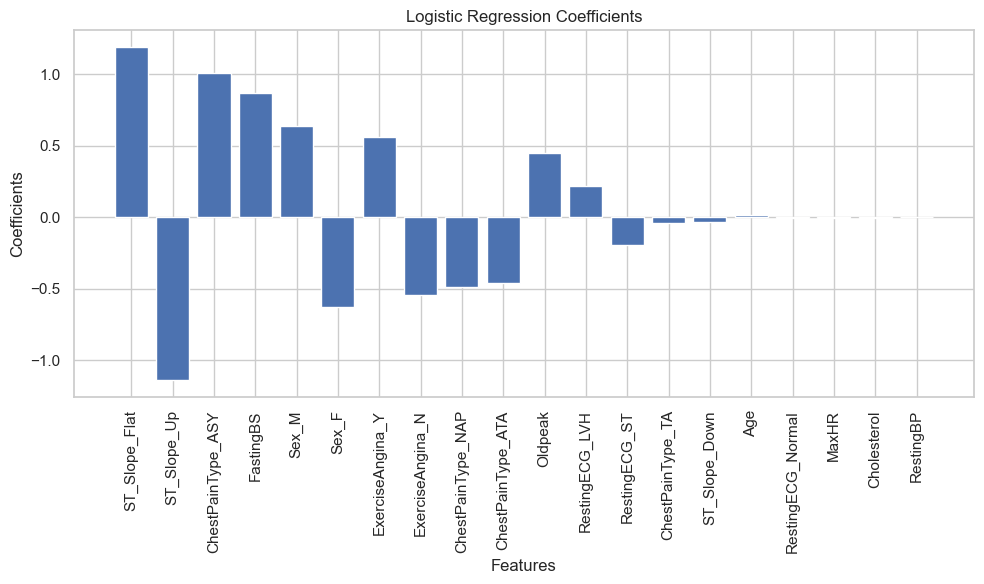

Accuracy: 0.8532608695652174
Confusion Matrix:
[[67 10]
 [17 90]]
Precision (PPV): 0.9
Recall (TPR): 0.8411214953271028
F1 Score: 0.8695652173913043
ROC AUC Score: 0.8556256827284863
True Positive Rate (TPR): 0.8411214953271028
True Negative Rate (TNR): 0.8701298701298701
False Positive Rate (FPR): 0.12987012987012986
False Negative Rate (FNR): 0.1588785046728972


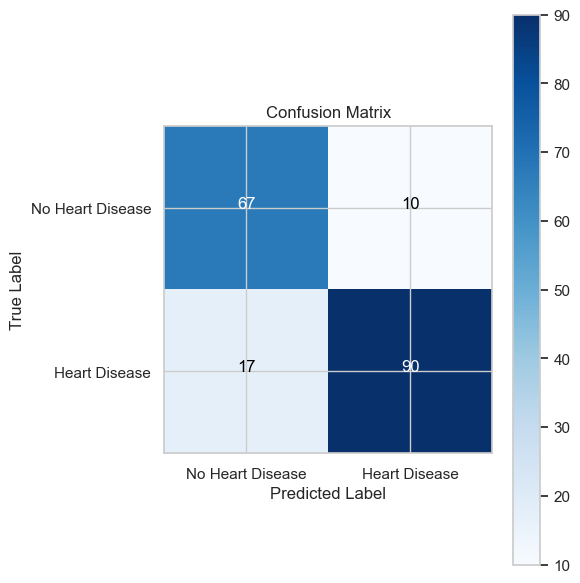

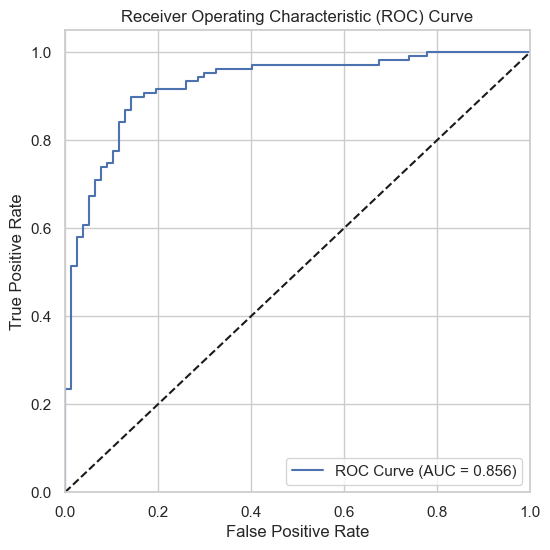

Permutation Feature Importance:
ST_Slope_Flat: 0.022 (+/- 0.007)
ST_Slope_Up: 0.018 (+/- 0.007)
ChestPainType_ASY: 0.018 (+/- 0.006)
FastingBS: 0.015 (+/- 0.006)
ChestPainType_ATA: 0.009 (+/- 0.005)
Cholesterol: 0.005 (+/- 0.012)
Sex_M: 0.003 (+/- 0.004)
Sex_F: 0.003 (+/- 0.004)
ChestPainType_NAP: 0.001 (+/- 0.005)
RestingECG_Normal: 0.000 (+/- 0.000)
ChestPainType_TA: 0.000 (+/- 0.000)
MaxHR: 0.000 (+/- 0.002)
ST_Slope_Down: 0.000 (+/- 0.000)
RestingBP: 0.000 (+/- 0.000)
Oldpeak: -0.002 (+/- 0.012)
RestingECG_ST: -0.002 (+/- 0.004)
ExerciseAngina_N: -0.004 (+/- 0.004)
ExerciseAngina_Y: -0.004 (+/- 0.004)
RestingECG_LVH: -0.004 (+/- 0.003)
Age: -0.010 (+/- 0.003)


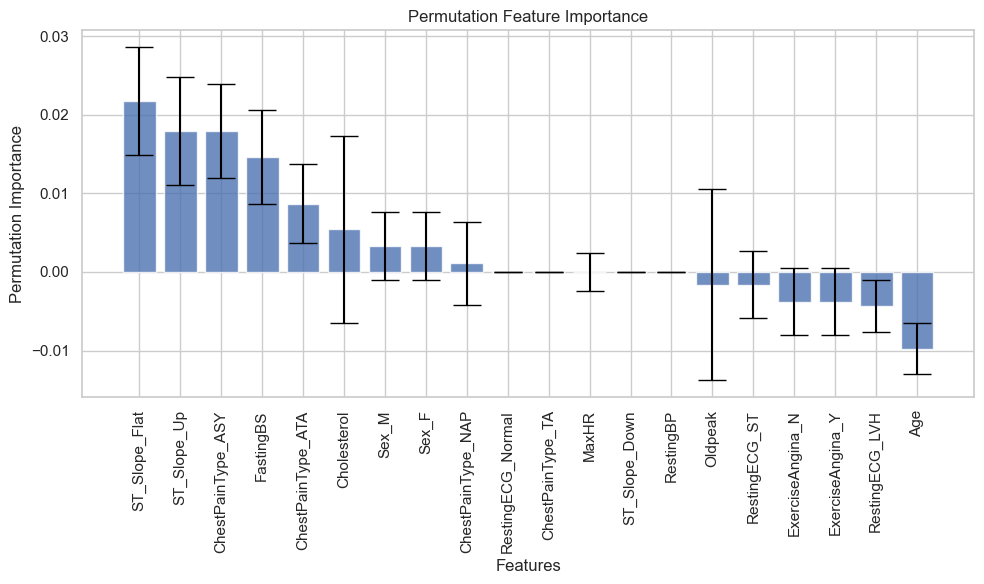

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv('heart.csv')

# Separate the features (X) and target variable (y)
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Get the coefficients of the model
coefficients = model.coef_[0]
feature_names = X.columns

# Sort the coefficients by absolute value in descending order
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Print the sorted coefficients
print("Logistic Regression Coefficients:")
for feature, coef in zip(sorted_feature_names, sorted_coefficients):
    print(f"{feature}: {coef}")

# Plot the sorted coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_coefficients)), sorted_coefficients)
plt.xticks(range(len(sorted_coefficients)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Coefficients')
plt.tight_layout()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

tn, fp, fn, tp = confusion.ravel()
tpr = recall
tnr = tn / (tn + fp)
ppv = precision
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Precision (PPV):", precision)
print("Recall (TPR):", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("True Positive Rate (TPR):", tpr)
print("True Negative Rate (TNR):", tnr)
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(confusion, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.yticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = confusion.max() / 2.0
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        plt.text(j, i, format(confusion[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Perform sensitivity analysis using permutation feature importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
std = result.importances_std

# Sort the features by importance
sorted_idx = importances.argsort()[::-1]
sorted_importances = importances[sorted_idx]
sorted_std = std[sorted_idx]
sorted_feature_names = X.columns[sorted_idx]

# Print the sorted feature importances
print("Permutation Feature Importance:")
for feature, importance, std in zip(sorted_feature_names, sorted_importances, sorted_std):
    print(f"{feature}: {importance:.3f} (+/- {std:.3f})")

# Plot the feature importances with error bars
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, yerr=sorted_std, align='center', alpha=0.8, ecolor='black', capsize=10)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()

# Logistic Regression Results

# Decision Tree

Best Hyperparameters:
{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}


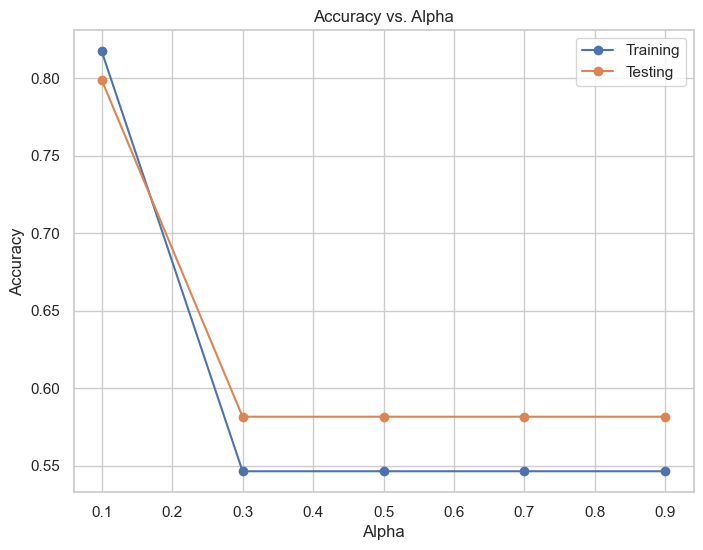

Accuracy (Best Model): 0.875
Confusion Matrix (Best Model):
[[66 11]
 [12 95]]
Precision (PPV) (Best Model): 0.8962264150943396
Recall (TPR) (Best Model): 0.8878504672897196
F1 Score (Best Model): 0.892018779342723
ROC AUC Score (Best Model): 0.8724966622162884
True Positive Rate (TPR) (Best Model): 0.8878504672897196
True Negative Rate (TNR) (Best Model): 0.8571428571428571
False Positive Rate (FPR) (Best Model): 0.14285714285714285
False Negative Rate (FNR) (Best Model): 0.11214953271028037


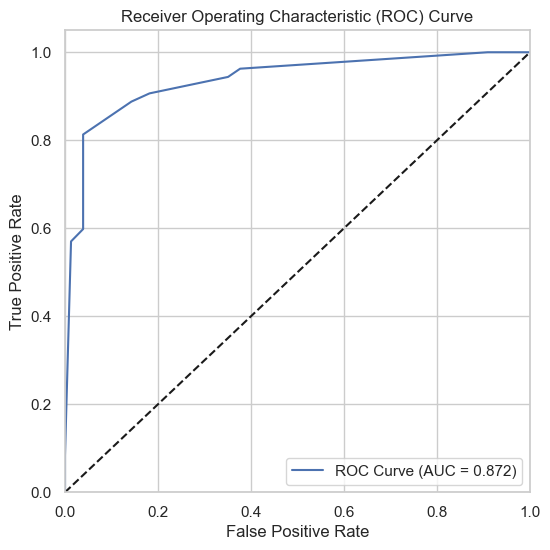

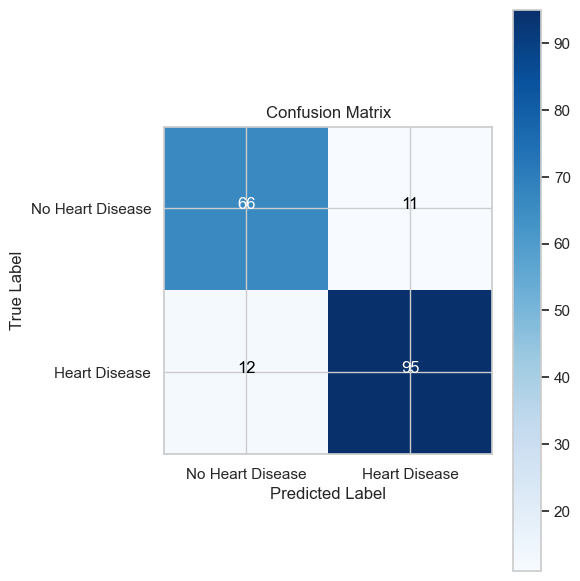

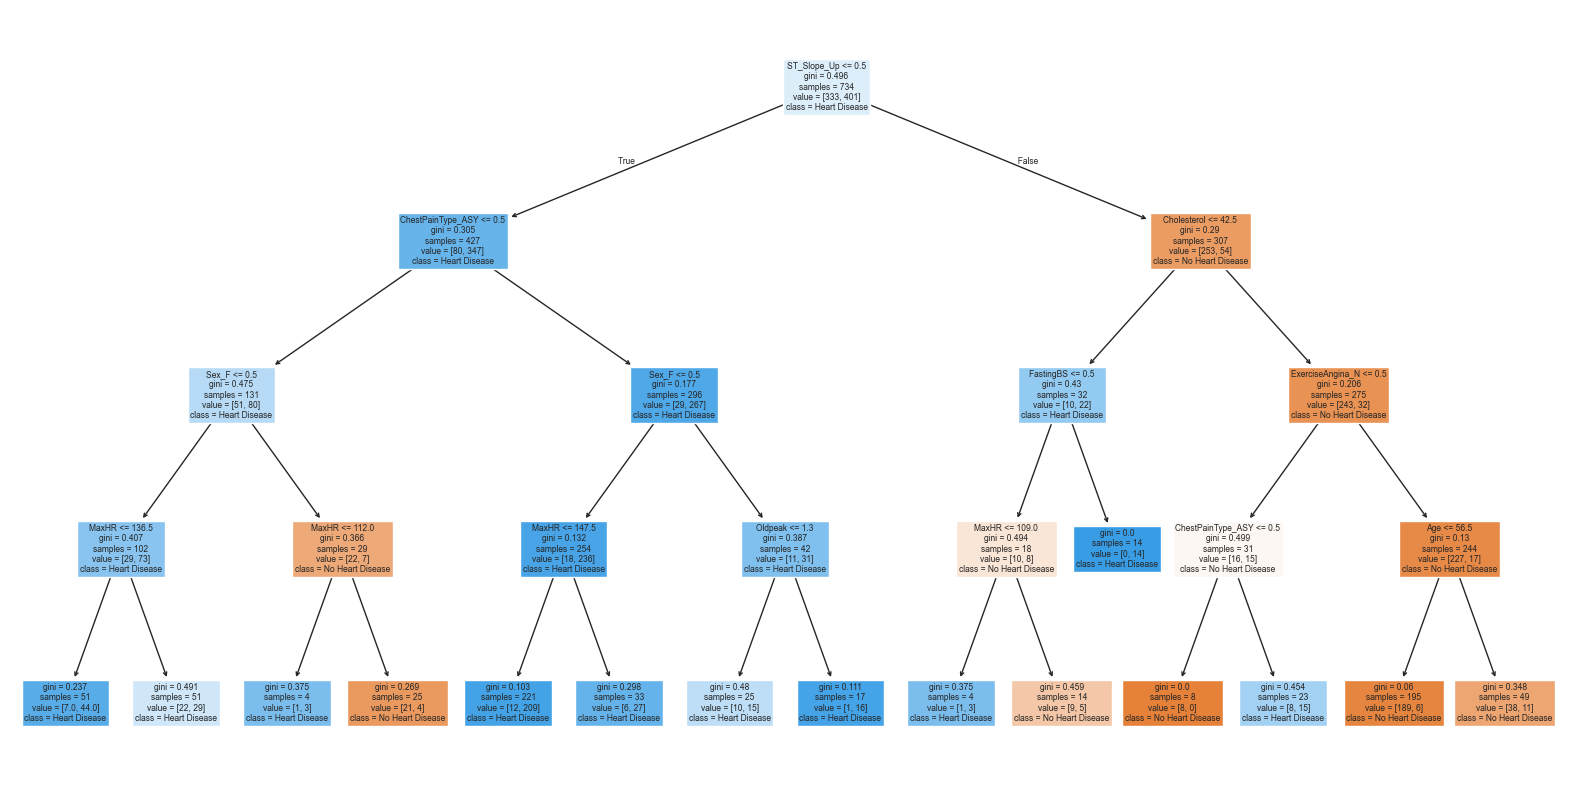

Permutation Feature Importance:
ST_Slope_Up: 0.209 (+/- 0.021)
Cholesterol: 0.046 (+/- 0.012)
ChestPainType_ASY: 0.040 (+/- 0.013)
FastingBS: 0.037 (+/- 0.010)
ExerciseAngina_N: 0.023 (+/- 0.008)
Sex_F: 0.002 (+/- 0.006)
MaxHR: 0.001 (+/- 0.004)
RestingBP: 0.000 (+/- 0.000)
Oldpeak: 0.000 (+/- 0.000)
Sex_M: 0.000 (+/- 0.000)
ChestPainType_ATA: 0.000 (+/- 0.000)
ST_Slope_Flat: 0.000 (+/- 0.000)
ChestPainType_NAP: 0.000 (+/- 0.000)
ChestPainType_TA: 0.000 (+/- 0.000)
RestingECG_LVH: 0.000 (+/- 0.000)
RestingECG_Normal: 0.000 (+/- 0.000)
RestingECG_ST: 0.000 (+/- 0.000)
ExerciseAngina_Y: 0.000 (+/- 0.000)
ST_Slope_Down: 0.000 (+/- 0.000)
Age: 0.000 (+/- 0.000)


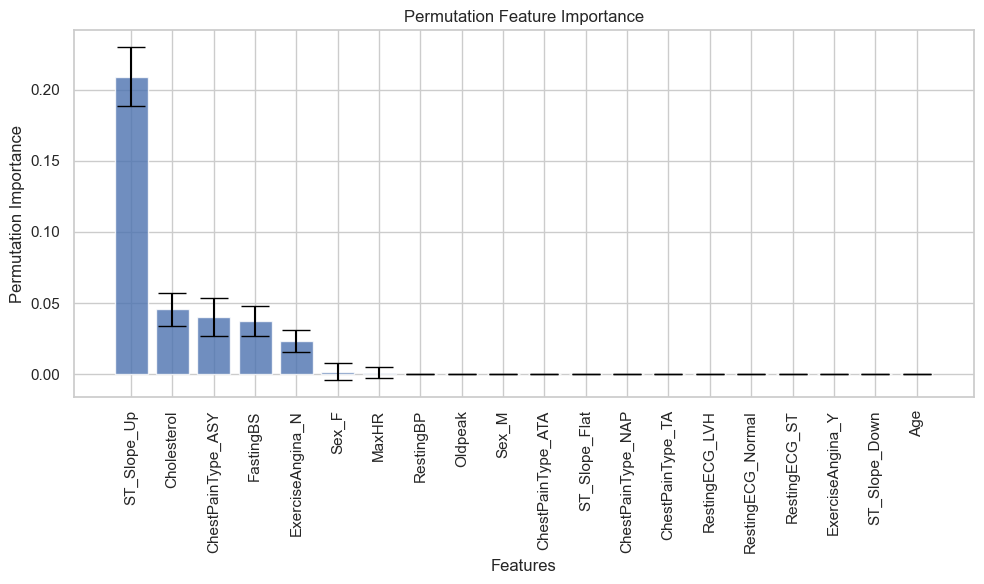

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv('heart.csv')

# Separate the features (X) and target variable (y)
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Plot accuracy vs. alpha for training and testing datasets
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]
train_accuracies = []
test_accuracies = []

for alpha in alphas:
    model = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    model.fit(X_train, y_train)
    train_accuracies.append(model.score(X_train, y_train))
    test_accuracies.append(model.score(X_test, y_test))

plt.figure(figsize=(8, 6))
plt.plot(alphas, train_accuracies, marker='o', label='Training')
plt.plot(alphas, test_accuracies, marker='o', label='Testing')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Alpha')
plt.legend()
plt.show()

# Make predictions using the best model
y_pred_best = best_model.predict(X_test)

# Calculate evaluation metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
confusion_best = confusion_matrix(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

tn, fp, fn, tp = confusion_best.ravel()
tpr = recall_best
tnr = tn / (tn + fp)
ppv = precision_best
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Print the evaluation metrics for the best model
print("Accuracy (Best Model):", accuracy_best)
print("Confusion Matrix (Best Model):")
print(confusion_best)
print("Precision (PPV) (Best Model):", precision_best)
print("Recall (TPR) (Best Model):", recall_best)
print("F1 Score (Best Model):", f1_best)
print("ROC AUC Score (Best Model):", roc_auc_best)
print("True Positive Rate (TPR) (Best Model):", tpr)
print("True Negative Rate (TNR) (Best Model):", tnr)
print("False Positive Rate (FPR) (Best Model):", fpr)
print("False Negative Rate (FNR) (Best Model):", fnr)

# Plot the ROC curve for the best model
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 6))
plt.plot(fpr_best, tpr_best, label=f'ROC Curve (AUC = {roc_auc_best:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(confusion_best, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.yticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = confusion_best.max() / 2.0
for i in range(confusion_best.shape[0]):
    for j in range(confusion_best.shape[1]):
        plt.text(j, i, format(confusion_best[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_best[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'])
plt.show()

# Perform sensitivity analysis using permutation feature importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
std = result.importances_std

# Sort the features by importance
sorted_idx = importances.argsort()[::-1]
sorted_importances = importances[sorted_idx]
sorted_std = std[sorted_idx]
sorted_feature_names = X.columns[sorted_idx]

# Print the sorted feature importances
print("Permutation Feature Importance:")
for feature, importance, std in zip(sorted_feature_names, sorted_importances, sorted_std):
    print(f"{feature}: {importance:.3f} (+/- {std:.3f})")

# Plot the feature importances with error bars
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, yerr=sorted_std, align='center', alpha=0.8, ecolor='black', capsize=10)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()

# Decision Trees Results

# Random Forest

Accuracy: 0.8804347826086957
Confusion Matrix:
[[67 10]
 [12 95]]
Precision (PPV): 0.9047619047619048
Recall (TPR): 0.8878504672897196
F1 Score: 0.8962264150943396
ROC AUC Score: 0.8789901687097949
True Positive Rate (TPR): 0.8878504672897196
True Negative Rate (TNR): 0.8701298701298701
False Positive Rate (FPR): 0.12987012987012986
False Negative Rate (FNR): 0.11214953271028037


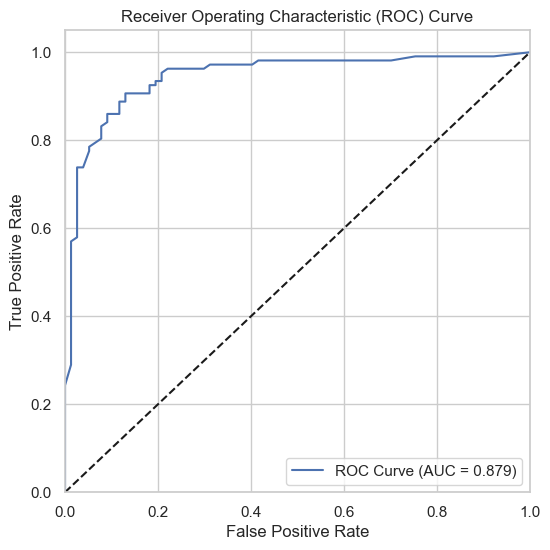

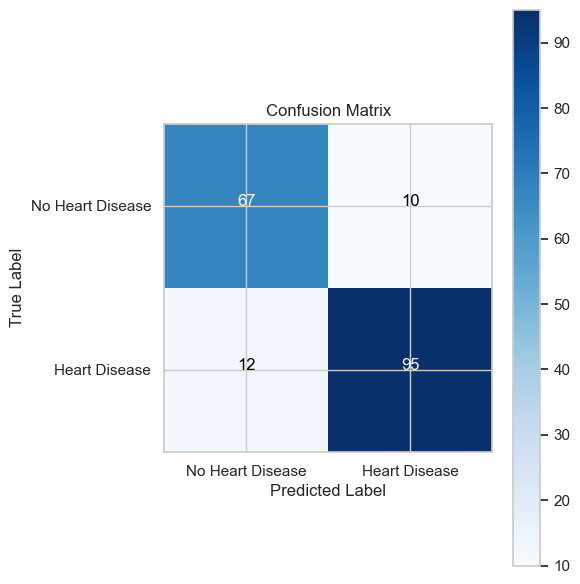

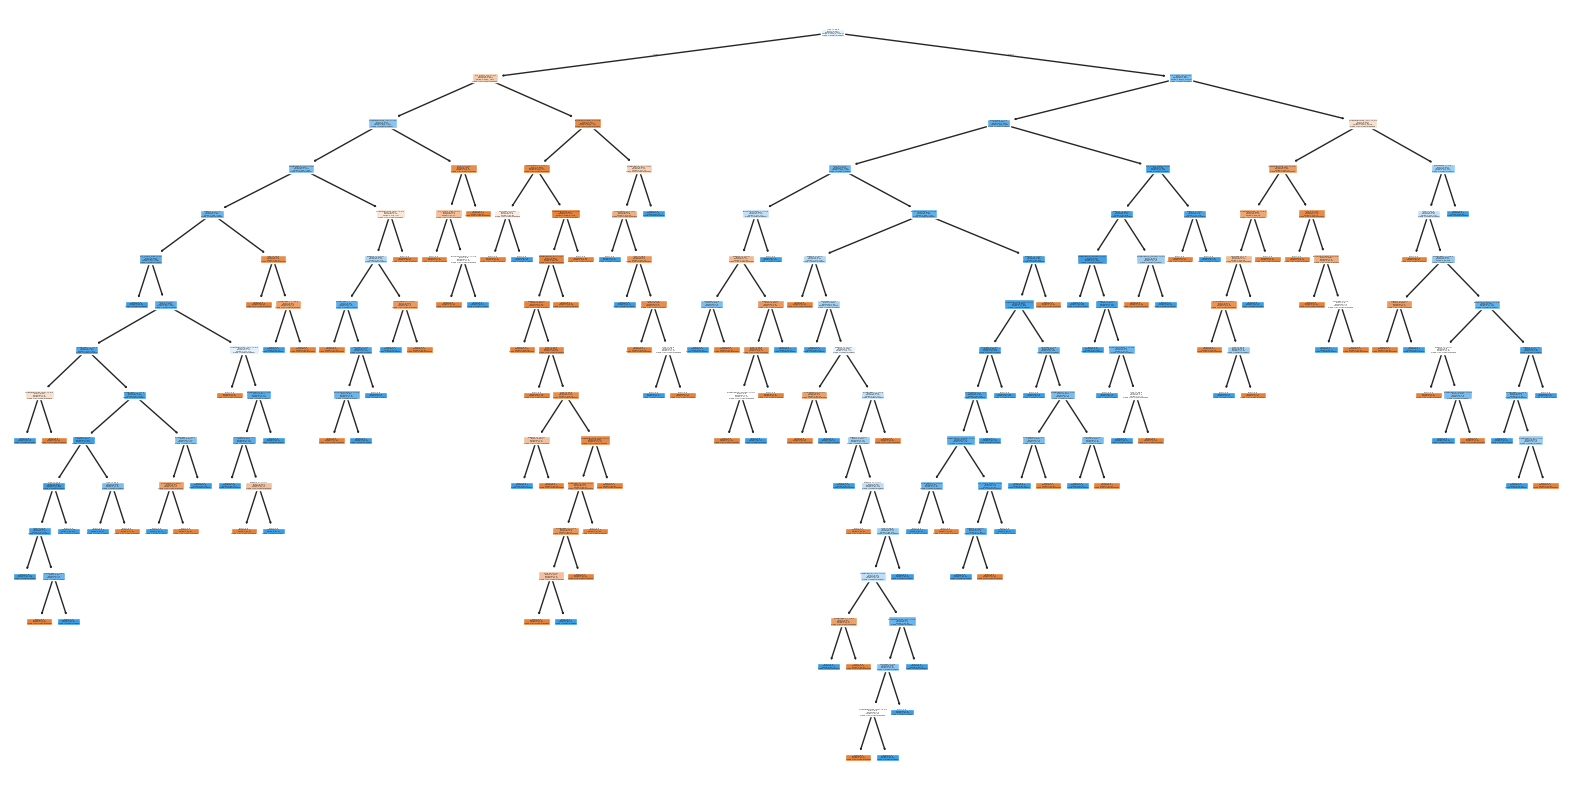

Permutation Feature Importance:
Cholesterol: 0.030 (+/- 0.010)
ST_Slope_Up: 0.026 (+/- 0.016)
ChestPainType_ASY: 0.025 (+/- 0.011)
ST_Slope_Flat: 0.020 (+/- 0.015)
FastingBS: 0.016 (+/- 0.004)
RestingBP: 0.013 (+/- 0.008)
MaxHR: 0.010 (+/- 0.009)
Oldpeak: 0.010 (+/- 0.016)
ExerciseAngina_Y: 0.009 (+/- 0.007)
ST_Slope_Down: 0.005 (+/- 0.000)
ChestPainType_TA: 0.005 (+/- 0.002)
ChestPainType_ATA: 0.004 (+/- 0.003)
RestingECG_LVH: 0.004 (+/- 0.002)
Sex_M: 0.004 (+/- 0.004)
RestingECG_ST: 0.001 (+/- 0.002)
RestingECG_Normal: -0.001 (+/- 0.004)
ExerciseAngina_N: -0.002 (+/- 0.008)
ChestPainType_NAP: -0.002 (+/- 0.002)
Sex_F: -0.009 (+/- 0.006)
Age: -0.010 (+/- 0.006)


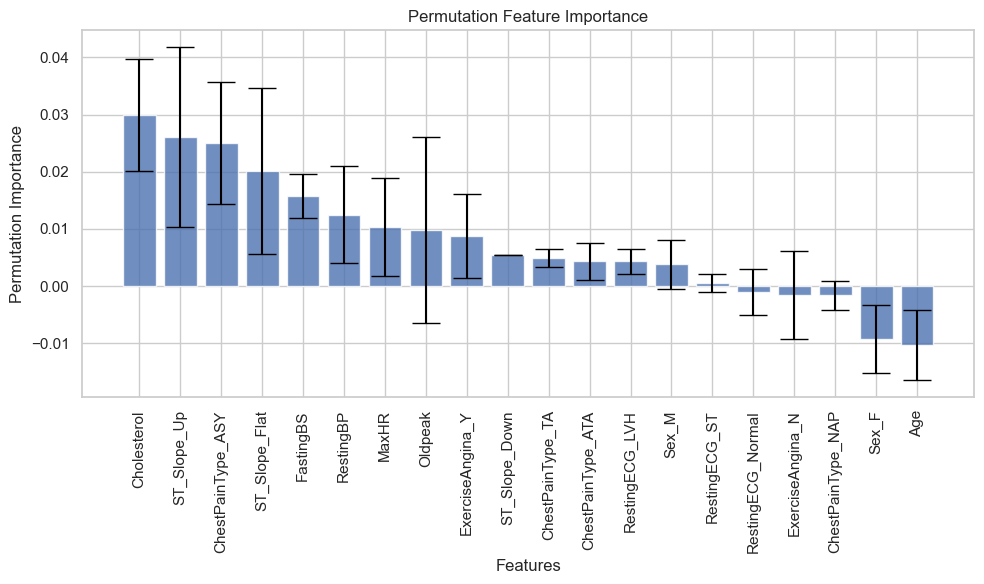

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv('heart.csv')

# Separate the features (X) and target variable (y)
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

tn, fp, fn, tp = confusion.ravel()
tpr = recall
tnr = tn / (tn + fp)
ppv = precision
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Precision (PPV):", precision)
print("Recall (TPR):", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("True Positive Rate (TPR):", tpr)
print("True Negative Rate (TNR):", tnr)
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(confusion, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.yticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = confusion.max() / 2.0
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        plt.text(j, i, format(confusion[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Visualize a decision tree from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'])
plt.show()

# Perform sensitivity analysis using permutation feature importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
std = result.importances_std

# Sort the features by importance
sorted_idx = importances.argsort()[::-1]
sorted_importances = importances[sorted_idx]
sorted_std = std[sorted_idx]
sorted_feature_names = X.columns[sorted_idx]

# Print the sorted feature importances
print("Permutation Feature Importance:")
for feature, importance, std in zip(sorted_feature_names, sorted_importances, sorted_std):
    print(f"{feature}: {importance:.3f} (+/- {std:.3f})")

# Plot the feature importances with error bars
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, yerr=sorted_std, align='center', alpha=0.8, ecolor='black', capsize=10)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
# Random Forest Results

# AdaBoost Classifer Model

Best Hyperparameters:
{'learning_rate': 0.1, 'n_estimators': 100}
Accuracy (Best Model): 0.8641304347826086
Confusion Matrix (Best Model):
[[68  9]
 [16 91]]
Precision (PPV) (Best Model): 0.91
Recall (TPR) (Best Model): 0.8504672897196262
F1 Score (Best Model): 0.8792270531400966
ROC AUC Score (Best Model): 0.8667920864182546
True Positive Rate (TPR) (Best Model): 0.8504672897196262
True Negative Rate (TNR) (Best Model): 0.8831168831168831
False Positive Rate (FPR) (Best Model): 0.11688311688311688
False Negative Rate (FNR) (Best Model): 0.14953271028037382


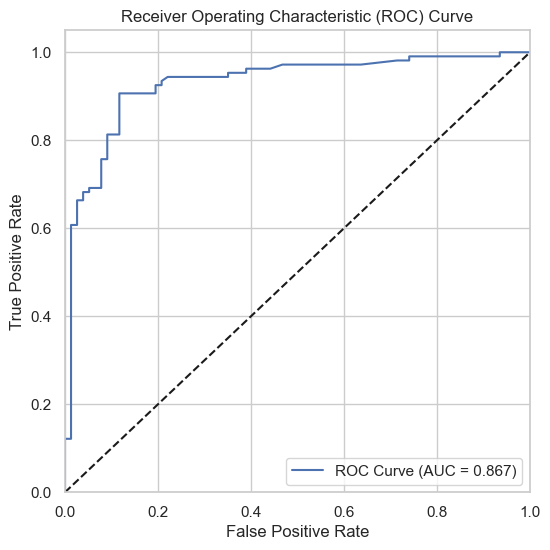

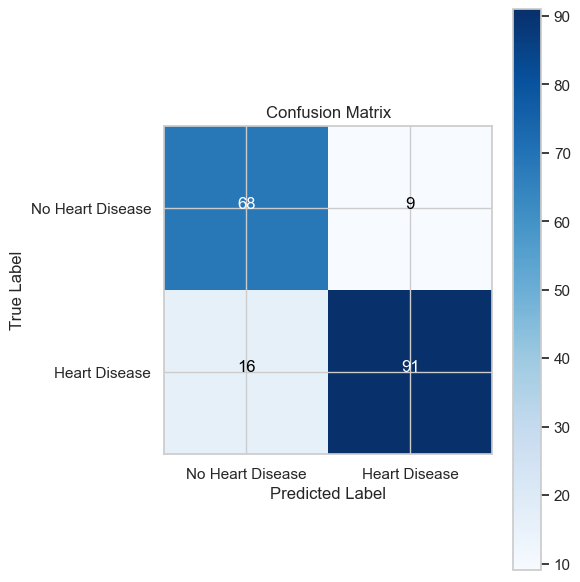

Permutation Feature Importance:
ST_Slope_Up: 0.080 (+/- 0.012)
ChestPainType_ASY: 0.039 (+/- 0.010)
FastingBS: 0.024 (+/- 0.007)
Cholesterol: 0.022 (+/- 0.008)
MaxHR: 0.010 (+/- 0.006)
ChestPainType_TA: 0.000 (+/- 0.000)
RestingBP: 0.000 (+/- 0.000)
ChestPainType_NAP: 0.000 (+/- 0.000)
ChestPainType_ATA: 0.000 (+/- 0.000)
RestingECG_LVH: 0.000 (+/- 0.000)
RestingECG_Normal: 0.000 (+/- 0.000)
RestingECG_ST: 0.000 (+/- 0.000)
ST_Slope_Down: 0.000 (+/- 0.000)
Oldpeak: -0.001 (+/- 0.008)
ExerciseAngina_N: -0.002 (+/- 0.004)
ExerciseAngina_Y: -0.002 (+/- 0.004)
Sex_M: -0.002 (+/- 0.004)
Age: -0.002 (+/- 0.005)
Sex_F: -0.008 (+/- 0.004)
ST_Slope_Flat: -0.010 (+/- 0.004)


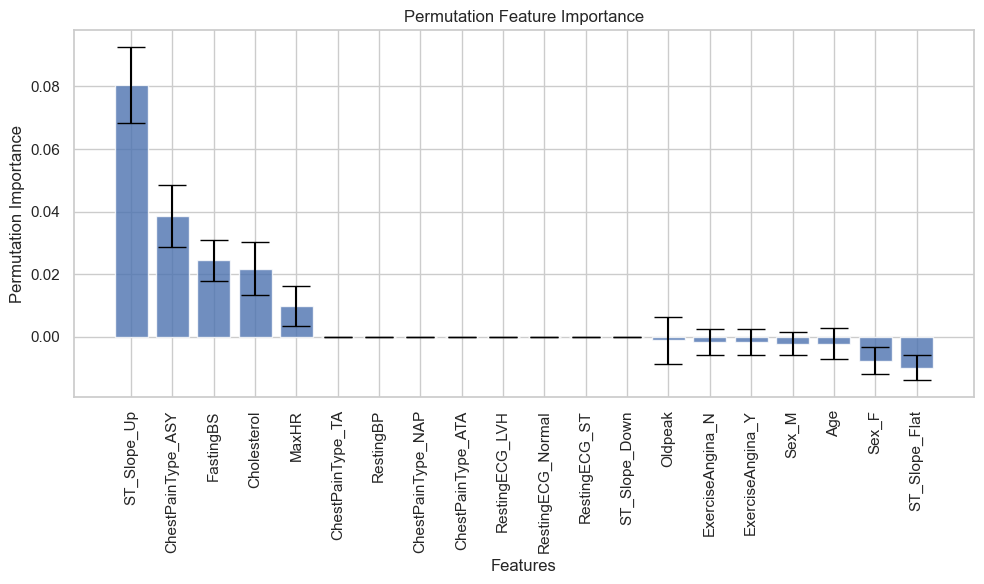

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv('heart.csv')

# Separate the features (X) and target variable (y)
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost model
base_estimator = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(base_estimator, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Perform hyperparameter tuning using grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Make predictions using the best model
y_pred_best = best_model.predict(X_test)

# Calculate evaluation metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
confusion_best = confusion_matrix(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

tn, fp, fn, tp = confusion_best.ravel()
tpr = recall_best
tnr = tn / (tn + fp)
ppv = precision_best
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Print the evaluation metrics for the best model
print("Accuracy (Best Model):", accuracy_best)
print("Confusion Matrix (Best Model):")
print(confusion_best)
print("Precision (PPV) (Best Model):", precision_best)
print("Recall (TPR) (Best Model):", recall_best)
print("F1 Score (Best Model):", f1_best)
print("ROC AUC Score (Best Model):", roc_auc_best)
print("True Positive Rate (TPR) (Best Model):", tpr)
print("True Negative Rate (TNR) (Best Model):", tnr)
print("False Positive Rate (FPR) (Best Model):", fpr)
print("False Negative Rate (FNR) (Best Model):", fnr)

# Plot the ROC curve for the best model
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 6))
plt.plot(fpr_best, tpr_best, label=f'ROC Curve (AUC = {roc_auc_best:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(confusion_best, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.yticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = confusion_best.max() / 2.0
for i in range(confusion_best.shape[0]):
    for j in range(confusion_best.shape[1]):
        plt.text(j, i, format(confusion_best[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_best[i, j] > thresh else "black")
plt.tight_layout()
plt.show()


# Perform sensitivity analysis using permutation feature importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
std = result.importances_std

# Sort the features by importance
sorted_idx = importances.argsort()[::-1]
sorted_importances = importances[sorted_idx]
sorted_std = std[sorted_idx]
sorted_feature_names = X.columns[sorted_idx]

# Print the sorted feature importances
print("Permutation Feature Importance:")
for feature, importance, std in zip(sorted_feature_names, sorted_importances, sorted_std):
    print(f"{feature}: {importance:.3f} (+/- {std:.3f})")

# Plot the feature importances with error bars
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, yerr=sorted_std, align='center', alpha=0.8, ecolor='black', capsize=10)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()

# AdaBoost Classifer Results

# Support Vector Machine

Best Hyperparameters:
{'C': 1, 'gamma': 0.01}


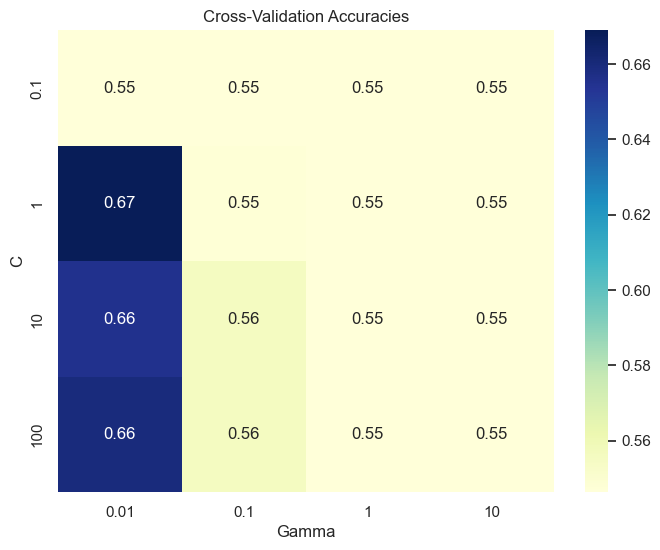

Accuracy (Best Model): 0.6793478260869565
Confusion Matrix (Best Model):
[[44 33]
 [26 81]]
Precision (PPV) (Best Model): 0.7105263157894737
Recall (TPR) (Best Model): 0.7570093457943925
F1 Score (Best Model): 0.7330316742081447
ROC AUC Score (Best Model): 0.6642189586114818
True Positive Rate (TPR) (Best Model): 0.7570093457943925
True Negative Rate (TNR) (Best Model): 0.5714285714285714
False Positive Rate (FPR) (Best Model): 0.42857142857142855
False Negative Rate (FNR) (Best Model): 0.24299065420560748


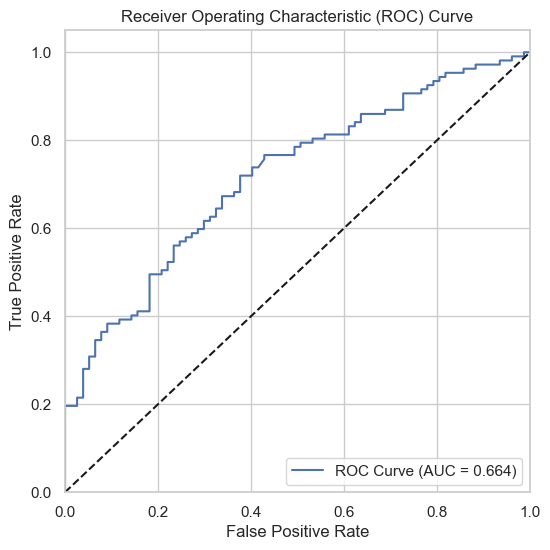

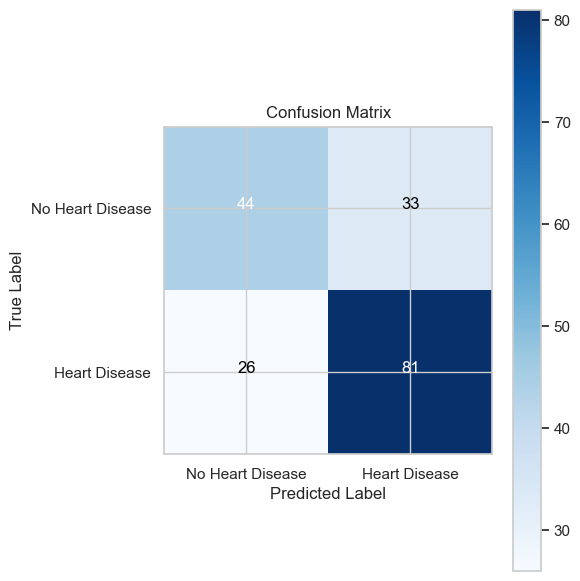

Permutation Feature Importance:
MaxHR: 0.078 (+/- 0.025)
Cholesterol: 0.068 (+/- 0.021)
Age: 0.045 (+/- 0.017)
RestingBP: 0.015 (+/- 0.023)
ChestPainType_NAP: 0.000 (+/- 0.000)
FastingBS: 0.000 (+/- 0.000)
Sex_F: 0.000 (+/- 0.000)
Sex_M: 0.000 (+/- 0.000)
ST_Slope_Flat: 0.000 (+/- 0.000)
ST_Slope_Up: 0.000 (+/- 0.000)
ChestPainType_TA: 0.000 (+/- 0.000)
RestingECG_LVH: 0.000 (+/- 0.000)
RestingECG_Normal: 0.000 (+/- 0.000)
RestingECG_ST: 0.000 (+/- 0.000)
ExerciseAngina_N: 0.000 (+/- 0.000)
ExerciseAngina_Y: 0.000 (+/- 0.000)
ST_Slope_Down: 0.000 (+/- 0.000)
ChestPainType_ATA: 0.000 (+/- 0.000)
Oldpeak: -0.001 (+/- 0.004)
ChestPainType_ASY: -0.003 (+/- 0.003)


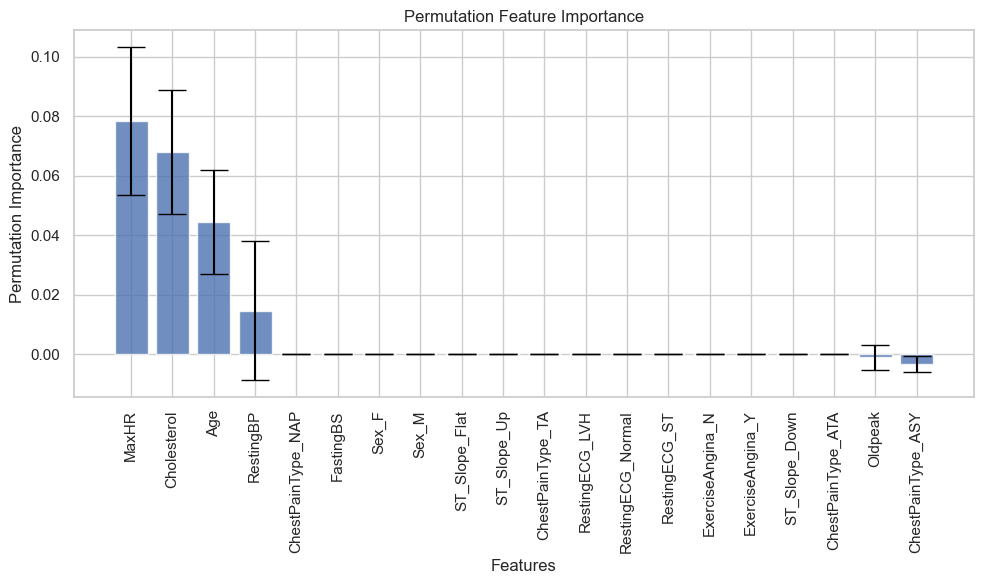

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
data = pd.read_csv('heart.csv')

# Separate the features (X) and target variable (y)
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model
model = SVC(kernel='rbf', random_state=42, probability=True)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Create a heatmap of cross-validation accuracies
cv_results = grid_search.cv_results_
mean_test_scores = cv_results['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.figure(figsize=(8, 6))
sns.heatmap(mean_test_scores, annot=True, cmap='YlGnBu', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Cross-Validation Accuracies')
plt.show()

# Make predictions using the best model
y_pred_best = best_model.predict(X_test)

# Calculate evaluation metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
confusion_best = confusion_matrix(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

tn, fp, fn, tp = confusion_best.ravel()
tpr = recall_best
tnr = tn / (tn + fp)
ppv = precision_best
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Print the evaluation metrics for the best model
print("Accuracy (Best Model):", accuracy_best)
print("Confusion Matrix (Best Model):")
print(confusion_best)
print("Precision (PPV) (Best Model):", precision_best)
print("Recall (TPR) (Best Model):", recall_best)
print("F1 Score (Best Model):", f1_best)
print("ROC AUC Score (Best Model):", roc_auc_best)
print("True Positive Rate (TPR) (Best Model):", tpr)
print("True Negative Rate (TNR) (Best Model):", tnr)
print("False Positive Rate (FPR) (Best Model):", fpr)
print("False Negative Rate (FNR) (Best Model):", fnr)

# Plot the ROC curve for the best model
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 6))
plt.plot(fpr_best, tpr_best, label=f'ROC Curve (AUC = {roc_auc_best:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(confusion_best, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.yticks(tick_marks, ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = confusion_best.max() / 2.0
for i in range(confusion_best.shape[0]):
    for j in range(confusion_best.shape[1]):
        plt.text(j, i, format(confusion_best[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_best[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Perform sensitivity analysis using permutation feature importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
std = result.importances_std

# Sort the features by importance
sorted_idx = importances.argsort()[::-1]
sorted_importances = importances[sorted_idx]
sorted_std = std[sorted_idx]
sorted_feature_names = X.columns[sorted_idx]

# Print the sorted feature importances
print("Permutation Feature Importance:")
for feature, importance, std in zip(sorted_feature_names, sorted_importances, sorted_std):
    print(f"{feature}: {importance:.3f} (+/- {std:.3f})")

# Plot the feature importances with error bars
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, yerr=sorted_std, align='center', alpha=0.8, ecolor='black', capsize=10)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()

# Support Vector Machine Results

# Interpretation of Analysis

# In Closing